# Tarea_17
## Francisco Ricardo Torres Arvizu
## Ejercicio 1
¿Como podemos evaluar funciones en matrices? Hint: ¿que operaciones sabemos que estan bien definidas sobre matrices?

Las  funciones de matrices las podemos evaluar en su respectiva serie de potencias(Taylor), ya que estan permitidas la adición y multiplicación en el espacio vectorial de las matrices.


## Ejercicio 2
¿Como se define una matriz simétrica?

Una matriz imetrica se define como aquella que cumple que $$A=A^{T}$$ donde $A^{T}$ es ma matriz transpuesta es la matriz transpuesta.

## Ejercicio 3
¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

Se puede contruir una matriz simétrica de matriz cuadrada A diagonalizandola si es que esta tiene $n$ eigenvectores distintos. y quedando de la forma 
$$A=PDP^{-1}$$, donde D es una matriz diagonal con los eigenvalores de A.

## Ejercicio 4: 
Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice: $$A=\left(\begin{array}{cc} -1 & 1\\ -1 & -1 \end{array} \right).$$
Grafique la trayectoria en el espacio de fase.
Recuerde que $\vec x(t) = e^{A t}\vec x_0$, y necesitamos graficar la trayectoria $\vec x(t)$ en el espacio de fase.
Nota 1: De momento no utilicen expm.
Nota 2: El operador * funciona para multiplicar matrices.
Note 3: Observen que la matriz $A$ no es simétrica, aqui no se cumple que $w^T=w^{-1}$.

In [2]:
function propagador(x0,A,t0,tf,h,f)
   
    w=eigvecs(A)
    D1=eigvals(A)
    t=[]
    dyarreglo=[]
    push!(dyarreglo,f(t0,x0))
    push!(t,t0)
      G1(t)=w*diagm(exp.(D1*t[length(t)]))*inv(w)
    Solutios=[]
    push!(Solutios,x0)
    while t[length(t)]<tf
        push!(t,t[length(t)]+h)
        push!(Solutios,G1(t[length(t)])*x0)
         push!(dyarreglo,f(t[length(t)],Solutios[length(Solutios)]))
    end
    return Solutios,t,dyarreglo
    
    end


propagador (generic function with 1 method)

In [3]:
function creadoradef(a,b,c,d)
    
    A= [a b; c d]

 return A
end 

creadoradef (generic function with 1 method)

In [4]:
xcomp(x)=x[1]
ycomp(x)=x[2]

ycomp (generic function with 1 method)

In [5]:
dx=xcomp.(propagador([1,2],[-1 1; -1 -1],0,5,0.01,(t,y)->[-1 1; -1 -1]*[y[1],y[2]])[3])
dy=ycomp.(propagador([1,2],[-1 1; -1 -1],0,5,0.01,(t,y)->[-1 1; -1 -1]*[y[1],y[2]])[3])

502-element Array{Number,1}:
           -3     
     -2.9799+0.0im
    -2.95961+0.0im
    -2.93914+0.0im
    -2.91848+0.0im
    -2.89766+0.0im
    -2.87668+0.0im
    -2.85555+0.0im
    -2.83426+0.0im
    -2.81284+0.0im
    -2.79128+0.0im
     -2.7696+0.0im
     -2.7478+0.0im
            ⋮     
  0.00314928+0.0im
  0.00288674+0.0im
  0.00262884+0.0im
  0.00237552+0.0im
  0.00212675+0.0im
  0.00188248+0.0im
  0.00164267+0.0im
  0.00140729+0.0im
  0.00117629+0.0im
 0.000949636+0.0im
 0.000727279+0.0im
  0.00050918+0.0im

In [6]:
x=xcomp.(propagador([1,2],[-1 1; -1 -1],0,5,0.01,(t,y)->[-1 1; -1 -1]*[y[1],y[2]])[1])
y=ycomp.(propagador([1,2],[-1 1; -1 -1],0,5,0.01,(t,y)->[-1 1; -1 -1]*[y[1],y[2]])[1])

502-element Array{Number,1}:
          2     
    1.9701+0.0im
    1.9404+0.0im
   1.91091+0.0im
   1.88162+0.0im
   1.85254+0.0im
   1.82367+0.0im
   1.79501+0.0im
   1.76656+0.0im
   1.73832+0.0im
    1.7103+0.0im
    1.6825+0.0im
   1.65491+0.0im
          ⋮     
 0.0100937+0.0im
 0.0101239+0.0im
 0.0101514+0.0im
 0.0101764+0.0im
  0.010199+0.0im
  0.010219+0.0im
 0.0102366+0.0im
 0.0102519+0.0im
 0.0102648+0.0im
 0.0102754+0.0im
 0.0102838+0.0im
   0.01029+0.0im

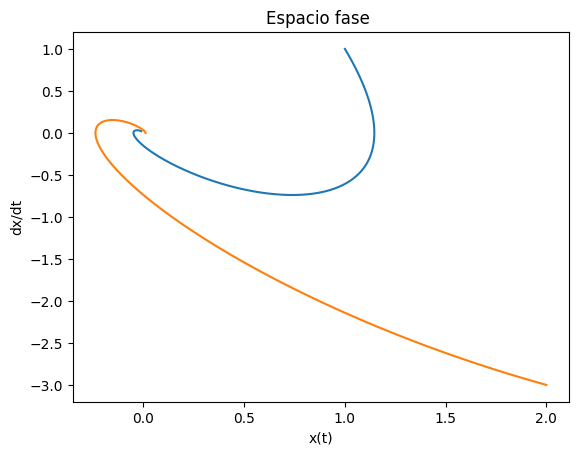

PyObject <matplotlib.text.Text object at 0x7f194486f350>

In [10]:
using PyPlot
plot(x,dx)
plot(y,dy)
xlabel("x(t)")
ylabel("dx/dt")
title("Espacio fase ")

In [ ]:
Para muchas condiciones

In [11]:
plt = PyPlot
function Grafica(x0,A,t0,tf,h,f)
h1=0.1
 for i in 1:20
   plt.subplot(2,1,1)
          plt.title("Espacio fase ")
    plt.tight_layout()
    plt.plot(xcomp.(propagador(x0*i*h1,A,t0,tf,h,f)[1]),xcomp.(propagador(x0*i*h1,A,t0,tf,h,f)[3]) )
        plt.xlabel("x(t)")
        plt.ylabel("dx/dt")
    plt.subplot(2,1,2)
    plt.tight_layout()
    plt.plot(ycomp.(propagador(x0*i*h1,A,t0,tf,h,f)[1]),ycomp.(propagador(x0*i*h1,A,t0,tf,h,f)[3]))
        plt.xlabel("x(t)")
        plt.ylabel("dx/dt")
        plt.title("Espacio fase ")
  end 
end

Grafica (generic function with 1 method)

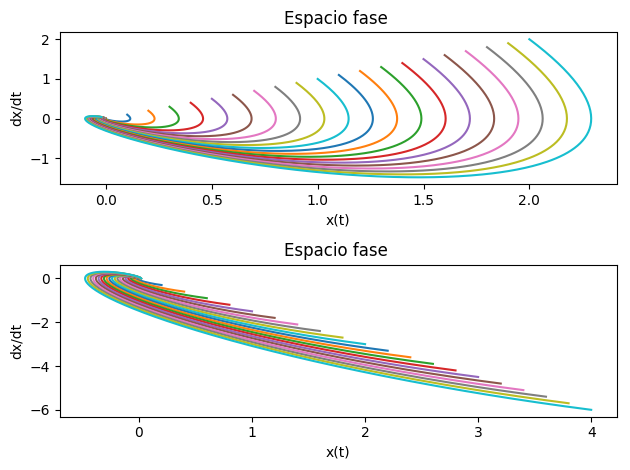

In [12]:
Grafica([1,2],[-1 1; -1 -1],0,5,0.01,(t,y)->[-1 1; -1 -1]*[y[1],y[2]])